In [3]:
# Importing all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc

from sklearn.svm import SVC

# DATA LOADING AND PREPROCESSING 

In [5]:
df = pd.read_csv("train_dataset_final1.csv")
df.head()

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,...,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default
0,5017,2,0,2,60000,25.0,2,2,2,0,...,20750.63,2000.21,0.00,1134.85,1821.78,1500.03,1500.24,41511.50,0.03,0
1,5018,2,1,1,290000,24.0,0,0,-2,-2,...,1350.30,0.00,0.17,0.00,2700.10,0.00,1349.72,2534.50,0.27,0
2,5019,1,0,2,180000,63.0,0,0,0,0,...,52991.51,2086.94,2199.99,1845.66,2000.35,1923.00,1999.78,50422.00,0.04,0
3,5020,1,1,2,210000,43.0,0,0,0,0,...,76945.47,3348.07,3380.91,3400.45,2683.97,2744.00,2892.10,86229.50,0.04,0
4,5021,2,0,1,280000,32.0,-2,-2,-2,-2,...,1.35,999.78,3186.27,45027.78,2100.09,0.01,0.27,11814.33,0.72,0


In [6]:
df.shape

(25247, 27)

In [7]:
df.describe()

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,...,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default
count,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25121.000000,25247.000000,25247.000000,25247.000000,25247.000000,...,25247.000000,25247.000000,2.524700e+04,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000
mean,17640.000000,1.551907,0.604111,1.852101,168342.060443,35.438199,-0.042857,-0.159544,-0.190359,-0.241415,...,38806.221029,5718.624966,6.047352e+03,5288.910651,4865.960834,4906.766828,5270.499287,44859.647485,0.362962,0.190399
std,7288.325459,0.522629,0.489050,0.797379,129892.784807,9.174998,1.099315,1.173990,1.172636,1.146753,...,59182.792531,16806.842125,2.400962e+04,17851.879609,15979.116544,15860.726852,17960.816915,62819.226119,5.047206,0.392624
min,5017.000000,0.000000,0.000000,0.000000,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-56043.170000,-546.930000,0.000000
25%,11328.500000,1.000000,0.000000,1.000000,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1241.710000,999.985000,9.219100e+02,399.990000,300.150000,262.365000,130.070000,4858.670000,0.040000,0.000000
50%,17640.000000,2.000000,1.000000,2.000000,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,17102.580000,2145.020000,2.026830e+03,1844.300000,1500.100000,1513.790000,1500.040000,21102.830000,0.090000,0.000000
75%,23951.500000,2.000000,1.000000,2.000000,240000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,49245.195000,5031.150000,5.000190e+03,4600.640000,4014.990000,4099.890000,4018.780000,57136.580000,0.590000,0.000000
max,30263.000000,3.000000,1.000000,6.000000,1000000.000000,79.000000,8.000000,8.000000,8.000000,7.000000,...,961663.620000,873551.980000,1.684259e+06,896040.150000,621000.080000,426529.180000,528666.150000,877313.830000,205.380000,1.000000


In [8]:
df1 = df[(df['AVG_Bill_amt']>0) | (df['PAY_TO_BILL_ratio']>0)]

In [9]:
print(df.isnull().sum())
df1 = df.dropna()

Customer_ID             0
marriage                0
sex                     0
education               0
LIMIT_BAL               0
age                   126
pay_0                   0
pay_2                   0
pay_3                   0
pay_4                   0
pay_5                   0
pay_6                   0
Bill_amt1               0
Bill_amt2               0
Bill_amt3               0
Bill_amt4               0
Bill_amt5               0
Bill_amt6               0
pay_amt1                0
pay_amt2                0
pay_amt3                0
pay_amt4                0
pay_amt5                0
pay_amt6                0
AVG_Bill_amt            0
PAY_TO_BILL_ratio       0
next_month_default      0
dtype: int64


In [10]:
df1.isnull().sum()

Customer_ID           0
marriage              0
sex                   0
education             0
LIMIT_BAL             0
age                   0
pay_0                 0
pay_2                 0
pay_3                 0
pay_4                 0
pay_5                 0
pay_6                 0
Bill_amt1             0
Bill_amt2             0
Bill_amt3             0
Bill_amt4             0
Bill_amt5             0
Bill_amt6             0
pay_amt1              0
pay_amt2              0
pay_amt3              0
pay_amt4              0
pay_amt5              0
pay_amt6              0
AVG_Bill_amt          0
PAY_TO_BILL_ratio     0
next_month_default    0
dtype: int64

# EDA AND FINANCIAL INSIGHTS

<Axes: xlabel='next_month_default', ylabel='count'>

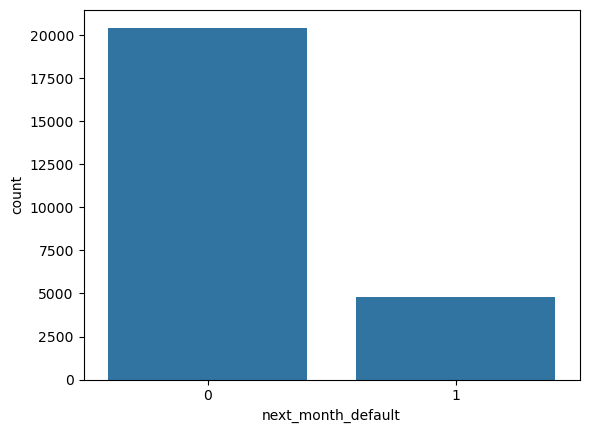

In [24]:

sns.countplot(x = 'next_month_default', data = df)

<Axes: ylabel='count'>

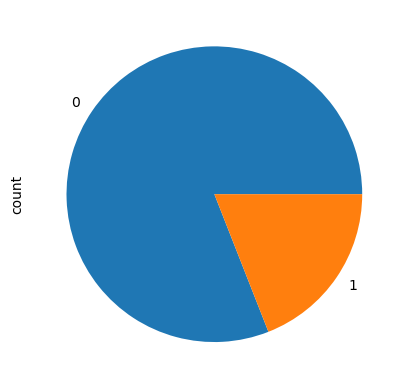

In [14]:
df["next_month_default"].value_counts().plot(kind = 'pie')
#Where 1 represents customer is defaulter and 0 is not...

<Axes: ylabel='count'>

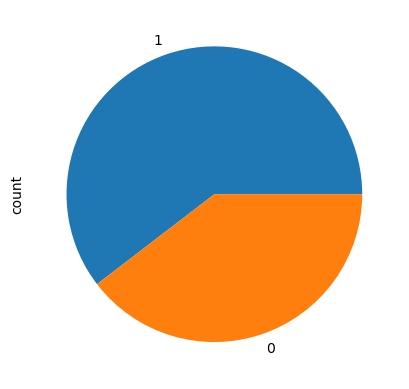

In [12]:
df["sex"].value_counts().plot(kind="pie")
#Where 1 represents male and 0 is female..

In [13]:
df['education'].value_counts()
#According to the feature (education)
# Education level (1 = Graduate School, 2 = University, 3 = High School, 4 = Others)
# So all the values that belongs to the category 0,5 and 6 will be added to the category 4

education
2    11717
1     8988
3     4115
5      253
4      116
6       44
0       14
Name: count, dtype: int64

In [14]:
df['education'] = df['education'].replace({0: 4, 5: 4, 6: 4})
df['education'].value_counts()

education
2    11717
1     8988
3     4115
4      427
Name: count, dtype: int64

<Axes: ylabel='count'>

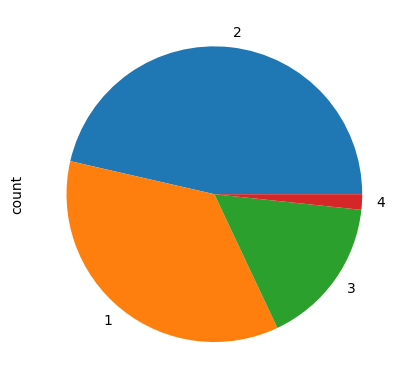

In [15]:
df['education'].value_counts().plot(kind="pie")

In [16]:
df['marriage'] = df['marriage'].replace({0: 3})

<Axes: ylabel='count'>

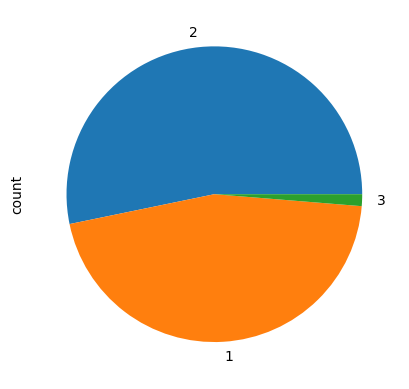

In [17]:
df['marriage'].value_counts().plot(kind="pie")

<Axes: xlabel='sex', ylabel='count'>

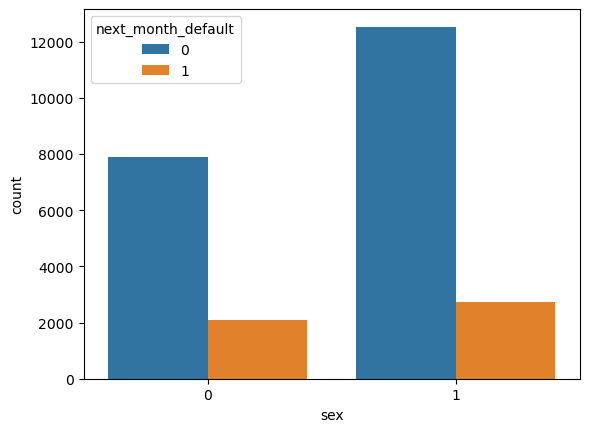

In [18]:
sns.countplot(data=df, x='sex', hue='next_month_default')

<Axes: xlabel='education', ylabel='count'>

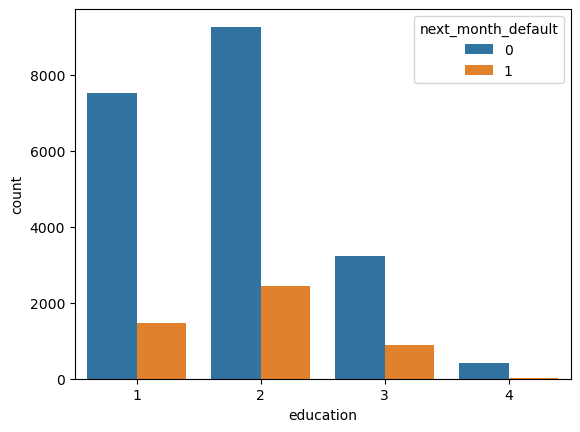

In [19]:
sns.countplot(data=df, x='education', hue='next_month_default')

<Axes: xlabel='marriage', ylabel='count'>

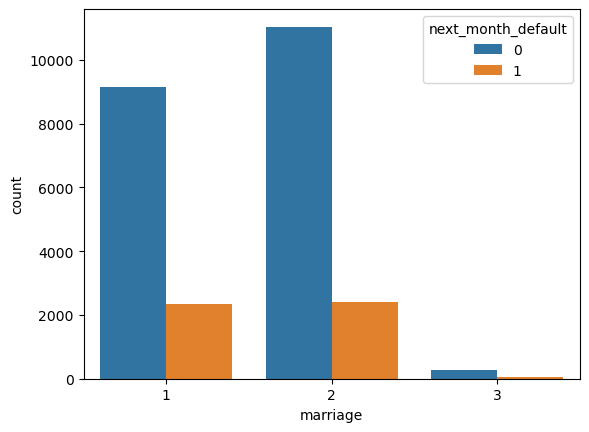

In [20]:
sns.countplot(data=df, x='marriage', hue='next_month_default')

*Below are some key insights*

In [22]:
group_counts = df.groupby(['sex', 'next_month_default']).size().unstack()
group_percent = (group_counts[1] / group_counts.sum(axis=1)) * 100

print(group_percent)

sex
0    20.86043
1    17.84684
dtype: float64


*There is 20.86 and 17.84 percent chance of women and men being a defaulter respectively ,so the probability of women being defaulter is more.*

In [24]:
group_counts = df.groupby(['marriage', 'next_month_default']).size().unstack()
group_percent = (group_counts[1] / group_counts.sum(axis=1)) * 100

print(group_percent)

marriage
1    20.374564
2    17.885574
3    19.631902
dtype: float64


*There is 20.37 and 17.88 percent chance of married and single being a defaulter respectively ,so probability of married being a defaulter is more.*

*Married individuals might have more financial responsibilities than others, finance planning services can help them.*

In [26]:
group_counts = df.groupby(['education', 'next_month_default']).size().unstack()
group_percent = (group_counts[1] / group_counts.sum(axis=1)) * 100

print(group_percent)

education
1    16.177125
2    20.909789
3    21.312272
4     6.088993
dtype: float64


*The Probability of university and high school students being a defaulter is more.*

In [28]:
def label_age(age):
    if age < 25:
        return "young"
    elif age < 40:
        return "young adults"
    elif age < 60:
        return "middle-aged"
    else:
        return "Seniors"

df_copy = df.copy()
df_copy['age_grp'] = df_copy['age'].map(label_age)

group_counts = df_copy.groupby(['age_grp', 'next_month_default']).size().unstack()
group_percent = (group_counts[1] / group_counts.sum(axis=1)) * 100
print(group_percent)


age_grp
Seniors         24.189526
middle-aged     20.432462
young           24.021352
young adults    17.507030
dtype: float64


*Seniors and young individuals used to default more ,Young adults might benefit from financial education and credit management tips.*

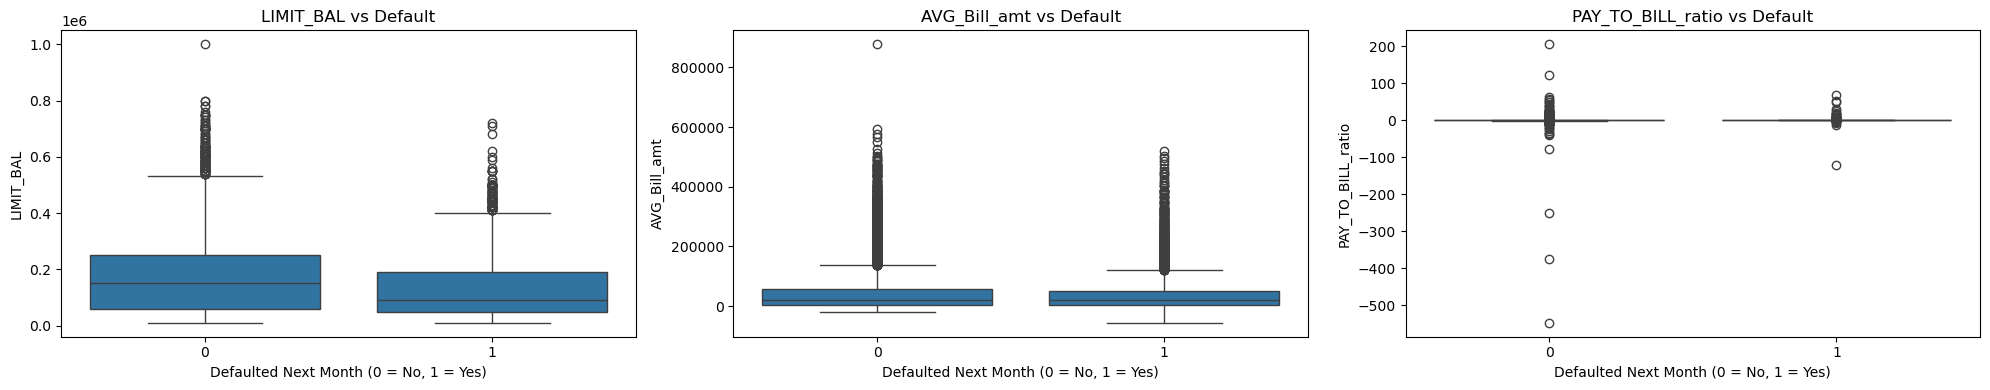

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

features = ['LIMIT_BAL', 'AVG_Bill_amt', 'PAY_TO_BILL_ratio']

plt.figure(figsize=(20, 4))

for i, feature in enumerate(features):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(data=df, x='next_month_default', y=feature)
    plt.title(f'{feature} vs Default')
    plt.xlabel('Defaulted Next Month (0 = No, 1 = Yes)')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()


In [31]:
df[df['next_month_default'] == 1]

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,...,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default
10,5027,2,1,2,210000,34.0,1,-1,-1,-1,...,0.59,1074.94,229.22,798.81,0.08,0.18,2246.98,350.50,2.07,1
15,5032,2,0,1,100000,29.0,2,2,2,2,...,51399.12,1800.01,0.08,4321.19,0.20,2399.94,0.15,49687.50,0.03,1
22,5039,2,0,2,120000,68.0,2,2,0,0,...,130078.15,4400.13,4436.03,4369.76,4440.10,12600.02,4500.12,124263.17,0.05,1
27,5044,2,0,1,180000,38.0,1,2,0,0,...,0.00,5000.13,4200.42,3000.21,5000.29,2000.08,0.00,100607.33,0.03,1
29,5046,2,1,3,20000,22.0,2,2,0,0,...,17352.41,0.00,1599.96,1499.78,2499.96,0.00,999.96,16017.67,0.07,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25225,30242,2,1,2,30000,24.0,2,0,0,0,...,0.00,1999.96,1200.23,0.00,0.18,0.09,0.14,18715.83,0.03,1
25226,30243,1,1,2,80000,35.0,1,2,2,2,...,34108.49,1851.95,0.48,3710.94,1550.08,0.00,1400.09,32884.83,0.04,1
25234,30251,2,1,1,100000,38.0,2,2,2,2,...,42696.50,3499.98,1499.51,1499.82,1500.11,1999.92,1500.14,40378.17,0.05,1
25243,30260,1,0,2,60000,49.0,0,0,0,0,...,19204.07,22000.17,2187.56,2501.13,2512.09,4004.89,2604.22,41371.67,0.14,1


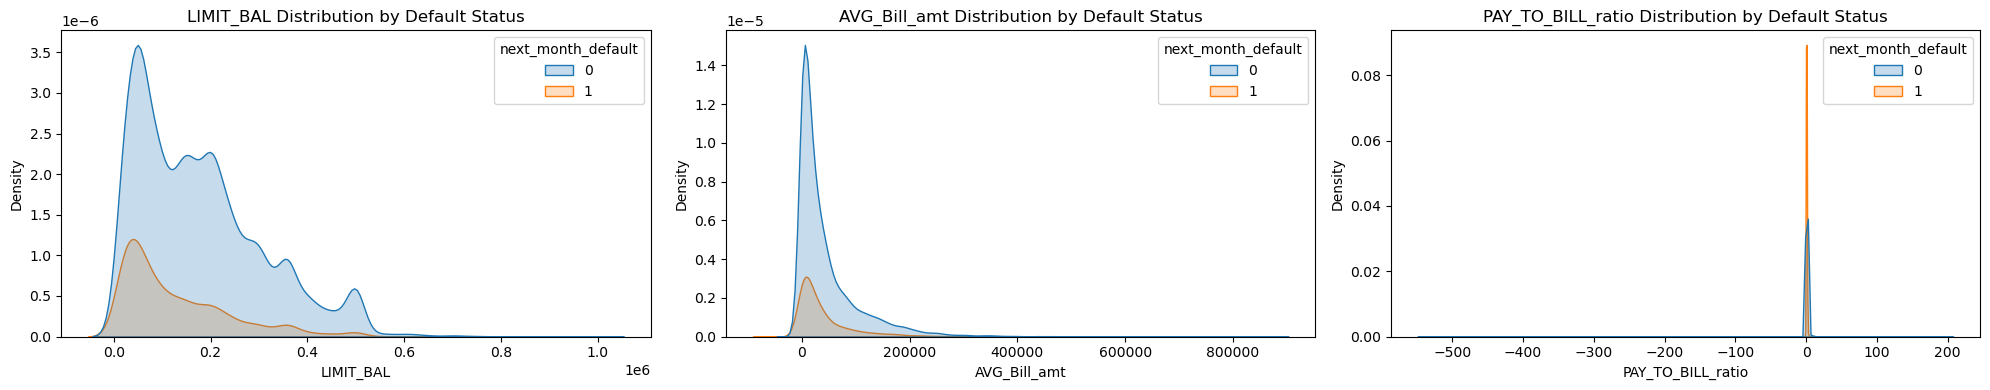

In [32]:
plt.figure(figsize=(20, 4))

for i, feature in enumerate(features):
    plt.subplot(1, 3, i + 1)
    sns.kdeplot(data=df, x=feature, hue='next_month_default', fill=True)
    plt.title(f'{feature} Distribution by Default Status')
    plt.xlabel(feature)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()


*LIMIT_BAL vs Default -- There is a noticeable difference in the median credit limit between defaulters and non-defaulters.
Defaulters generally have lower credit limits.*

*AVG_Bill_amt vs Default -- Both defaulters and non-defaulters have similar distributions, defaulters tend to have slightly higher average bills.*

*PAY_TO_BILL_ratio vs Default -- Defaulters often have lower repayment ratios. There's a sharp peak near zero, indicating minimal or no repayment from many defaulters.*

**Lower credit limits and repayment ratios are significant predictors of default.**

In [34]:
defaulters = df[df['next_month_default'] == 1]
non_defaulters = df[df['next_month_default'] == 0]

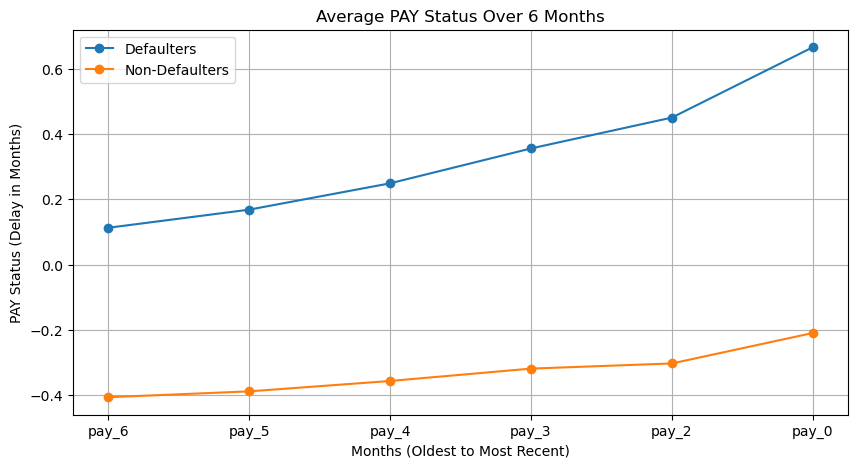

In [35]:
pay_cols = ['pay_6', 'pay_5', 'pay_4', 'pay_3', 'pay_2', 'pay_0']

plt.figure(figsize=(10, 5))
plt.plot(pay_cols, defaulters[pay_cols].mean(), label='Defaulters', marker='o')
plt.plot(pay_cols, non_defaulters[pay_cols].mean(), label='Non-Defaulters', marker='o')
plt.title('Average PAY Status Over 6 Months')
plt.xlabel('Months (Oldest to Most Recent)')
plt.ylabel('PAY Status (Delay in Months)')
plt.legend()
plt.grid(True)
plt.show()


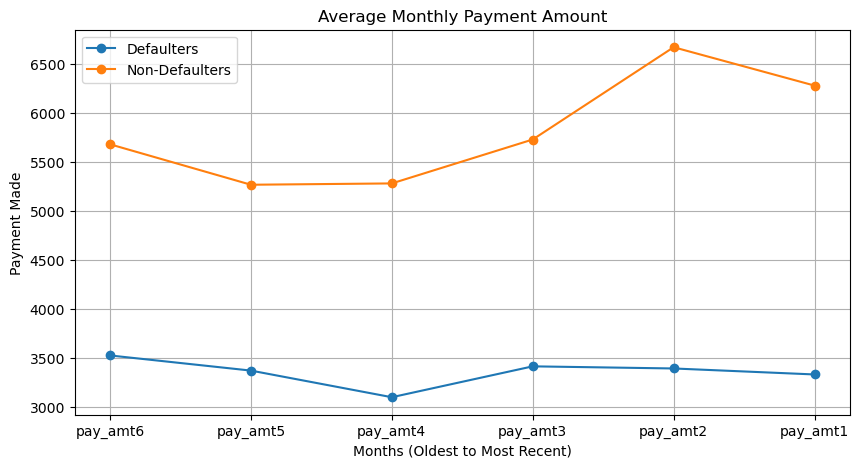

In [36]:
pay_amt_cols = ['pay_amt6', 'pay_amt5', 'pay_amt4', 'pay_amt3', 'pay_amt2', 'pay_amt1']

plt.figure(figsize=(10, 5))
plt.plot(pay_amt_cols, defaulters[pay_amt_cols].mean(), label='Defaulters', marker='o')
plt.plot(pay_amt_cols, non_defaulters[pay_amt_cols].mean(), label='Non-Defaulters', marker='o')
plt.title('Average Monthly Payment Amount')
plt.xlabel('Months (Oldest to Most Recent)')
plt.ylabel('Payment Made')
plt.legend()
plt.grid(True)
plt.show()



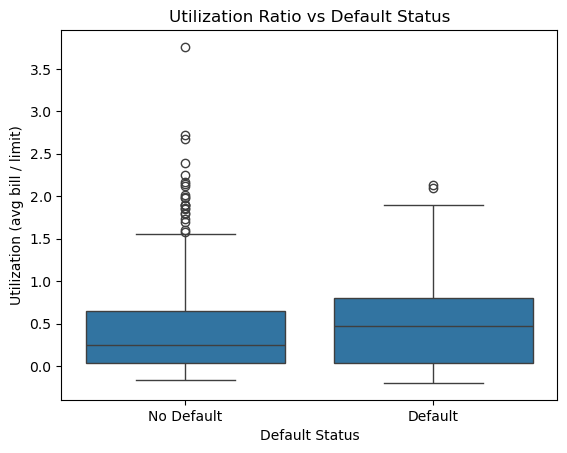

In [37]:
df_copy1 = df.copy()
df_copy1['utilization'] = df_copy1['AVG_Bill_amt'] / df_copy1['LIMIT_BAL']

sns.boxplot(data=df_copy1, x='next_month_default', y='utilization')
plt.title('Utilization Ratio vs Default Status')
plt.xticks([0, 1], ['No Default', 'Default'])
plt.xlabel('Default Status')
plt.ylabel('Utilization (avg bill / limit)')
plt.show()


*Non-defaulters show more extreme outliers in over-limit usage while still avoiding default.*

**Over-limit usage alone isn't predictive - it's the customer's ability to recover and manage these situations that determines default risk.**

*Defaulters show a clear pattern of escalating payment delays - this is a classic early warning signal.*

*Customers with a recent payment delay of more than one month (PAY_0 > 1) show a default rate exceeding 38% Defaulters.*

*Defaulters likely making only minimum payments, indicating cash flow stress.*

**Consistently low payment amounts combined with delays signal high default risk.**

In [40]:
pay_cols = [f'pay_{i}' for i in range(0, 7)]
pay_cols.pop(1)
# Flag delayed payers (if any PAY_x >= 1)
df['delayed'] = df[pay_cols].apply(lambda row: any(val >= 1 for val in row), axis=1)

delayed_payers = df[df['delayed'] == True]

print("Delayed payer count:", len(delayed_payers))
print("Default rate among delayed payers: {:.2f}%".format(
    100 * delayed_payers['next_month_default'].mean()))

Delayed payer count: 8127
Default rate among delayed payers: 38.24%


In [41]:
df

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,...,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default,delayed
0,5017,2,0,2,60000,25.0,2,2,2,0,...,2000.21,0.00,1134.85,1821.78,1500.03,1500.24,41511.50,0.03,0,True
1,5018,2,1,1,290000,24.0,0,0,-2,-2,...,0.00,0.17,0.00,2700.10,0.00,1349.72,2534.50,0.27,0,False
2,5019,1,0,2,180000,63.0,0,0,0,0,...,2086.94,2199.99,1845.66,2000.35,1923.00,1999.78,50422.00,0.04,0,False
3,5020,1,1,2,210000,43.0,0,0,0,0,...,3348.07,3380.91,3400.45,2683.97,2744.00,2892.10,86229.50,0.04,0,False
4,5021,2,0,1,280000,32.0,-2,-2,-2,-2,...,999.78,3186.27,45027.78,2100.09,0.01,0.27,11814.33,0.72,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25242,30259,1,1,2,90000,33.0,0,0,0,0,...,2800.18,3999.97,8000.09,5347.85,3699.98,3128.06,82312.50,0.05,0,True
25243,30260,1,0,2,60000,49.0,0,0,0,0,...,22000.17,2187.56,2501.13,2512.09,4004.89,2604.22,41371.67,0.14,1,False
25244,30261,2,0,1,120000,31.0,-1,-1,-1,-1,...,1315.83,1315.60,533.08,4116.08,9834.10,7100.12,3071.83,1.31,1,False
25245,30262,1,1,4,390000,40.0,0,0,0,0,...,7636.03,5652.86,5544.67,5532.37,5859.09,6818.14,197278.83,0.03,0,False


In [42]:
import numpy as np

pay_cols = ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']

def max_delinquency_streak(row):
    max_streak = 0
    current_streak = 0
    for val in row:
        if val > 0:
            current_streak += 1
            max_streak = max(max_streak, current_streak)
        else:
            current_streak = 0
    return max_streak

df_copy1['max_delinquency_streak'] = df_copy1[pay_cols].apply(max_delinquency_streak, axis=1)


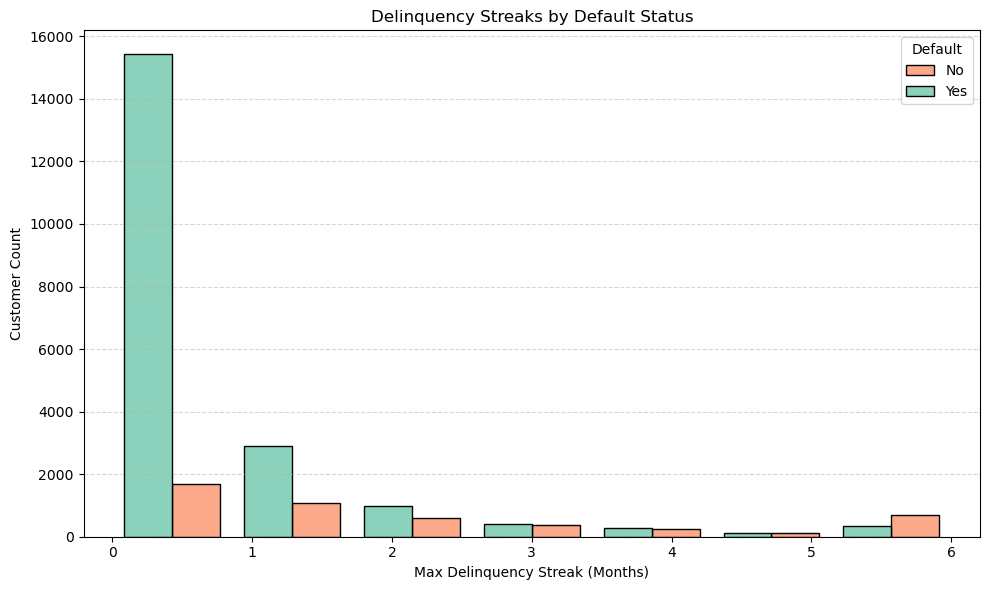

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(data=df_copy1, x='max_delinquency_streak', hue='next_month_default', multiple='dodge', shrink=0.8, palette='Set2', bins=7)
plt.title('Delinquency Streaks by Default Status')
plt.xlabel('Max Delinquency Streak (Months)')
plt.ylabel('Customer Count')
plt.legend(title='Default', labels=['No', 'Yes'])
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [44]:
streak_analysis = df_copy1.groupby('max_delinquency_streak')['next_month_default'].agg(['count', 'sum', 'mean'])
streak_analysis.columns = ['Total_Customers', 'Total_Defaults', 'Default_Rate']
streak_analysis['Default_Percentage'] = (streak_analysis['Default_Rate'] * 100).round(1)

print("Default Rates by Delinquency Streak Length:")
rate_0_1 = df_copy1[df_copy1['max_delinquency_streak'] <= 1]['next_month_default'].mean()
rate_2_plus = df_copy1[df_copy1['max_delinquency_streak'] >= 2]['next_month_default'].mean()

print(f"\nDefault rate (0-1 streaks): {rate_0_1:.3f} ({rate_0_1*100:.1f}%)")
print(f"Default rate (2+ streaks): {rate_2_plus:.3f} ({rate_2_plus*100:.1f}%)")
streak_4_plus = df_copy1[df_copy1['max_delinquency_streak'] >= 4]

if len(streak_4_plus) > 0:
    rate_4_plus = streak_4_plus['next_month_default'].mean()
    print(f"\n4+ month streaks: {rate_4_plus:.3f} ({rate_4_plus*100:.1f}% default rate)")

Default Rates by Delinquency Streak Length:

Default rate (0-1 streaks): 0.132 (13.2%)
Default rate (2+ streaks): 0.490 (49.0%)

4+ month streaks: 0.592 (59.2% default rate)


In [45]:
df

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,...,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default,delayed
0,5017,2,0,2,60000,25.0,2,2,2,0,...,2000.21,0.00,1134.85,1821.78,1500.03,1500.24,41511.50,0.03,0,True
1,5018,2,1,1,290000,24.0,0,0,-2,-2,...,0.00,0.17,0.00,2700.10,0.00,1349.72,2534.50,0.27,0,False
2,5019,1,0,2,180000,63.0,0,0,0,0,...,2086.94,2199.99,1845.66,2000.35,1923.00,1999.78,50422.00,0.04,0,False
3,5020,1,1,2,210000,43.0,0,0,0,0,...,3348.07,3380.91,3400.45,2683.97,2744.00,2892.10,86229.50,0.04,0,False
4,5021,2,0,1,280000,32.0,-2,-2,-2,-2,...,999.78,3186.27,45027.78,2100.09,0.01,0.27,11814.33,0.72,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25242,30259,1,1,2,90000,33.0,0,0,0,0,...,2800.18,3999.97,8000.09,5347.85,3699.98,3128.06,82312.50,0.05,0,True
25243,30260,1,0,2,60000,49.0,0,0,0,0,...,22000.17,2187.56,2501.13,2512.09,4004.89,2604.22,41371.67,0.14,1,False
25244,30261,2,0,1,120000,31.0,-1,-1,-1,-1,...,1315.83,1315.60,533.08,4116.08,9834.10,7100.12,3071.83,1.31,1,False
25245,30262,1,1,4,390000,40.0,0,0,0,0,...,7636.03,5652.86,5544.67,5532.37,5859.09,6818.14,197278.83,0.03,0,False


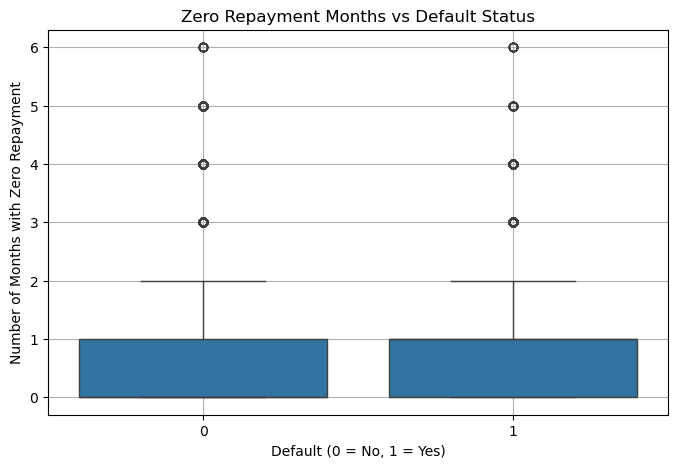

In [46]:
pay_amt_cols = [f'pay_amt{i}' for i in range(1, 7)]

# Step 2: Create a new column that counts months with 0 payment
df_copy1['zero_repayment_months'] = (df_copy1[pay_amt_cols] == 0).sum(axis=1)

# Optional: Analyze its impact on defaulting
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(x='next_month_default', y='zero_repayment_months', data=df_copy1)
plt.title('Zero Repayment Months vs Default Status')
plt.xlabel('Default (0 = No, 1 = Yes)')
plt.ylabel('Number of Months with Zero Repayment')
plt.grid(True)
plt.show()


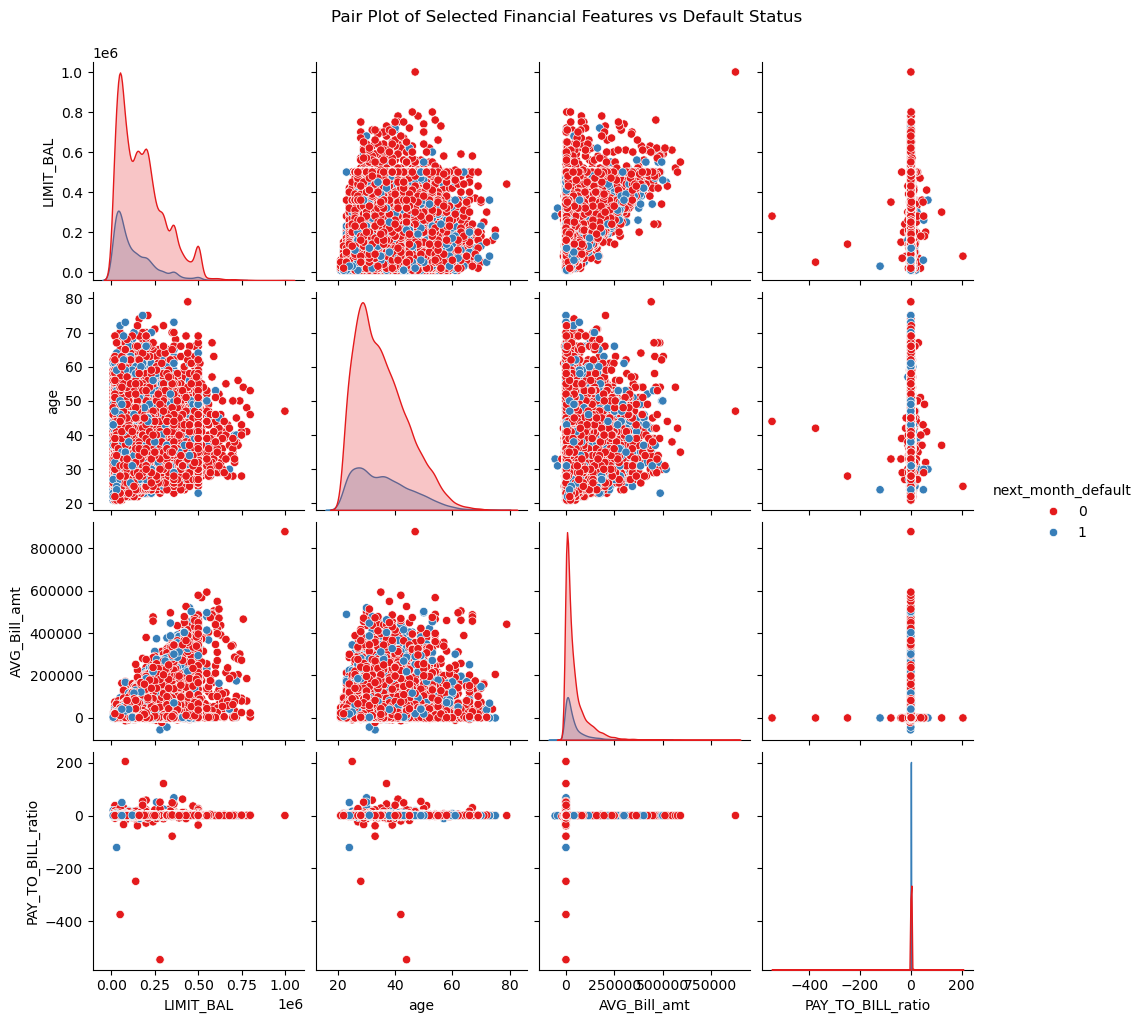

In [47]:
# Selecting a subset of numeric features
features = ['LIMIT_BAL', 'age', 'AVG_Bill_amt', 'PAY_TO_BILL_ratio', 'next_month_default']

# Pair plot with hue based on default status
sns.pairplot(df[features], hue='next_month_default', diag_kind='kde', palette='Set1')
plt.suptitle('Pair Plot of Selected Financial Features vs Default Status', y=1.02)
plt.show()


*Both defaulters and non-defaulters show identical distributions for zero repayment months.*
                                                                
*This suggests that having months with zero payments is a normal behavior pattern across all customer segments.*

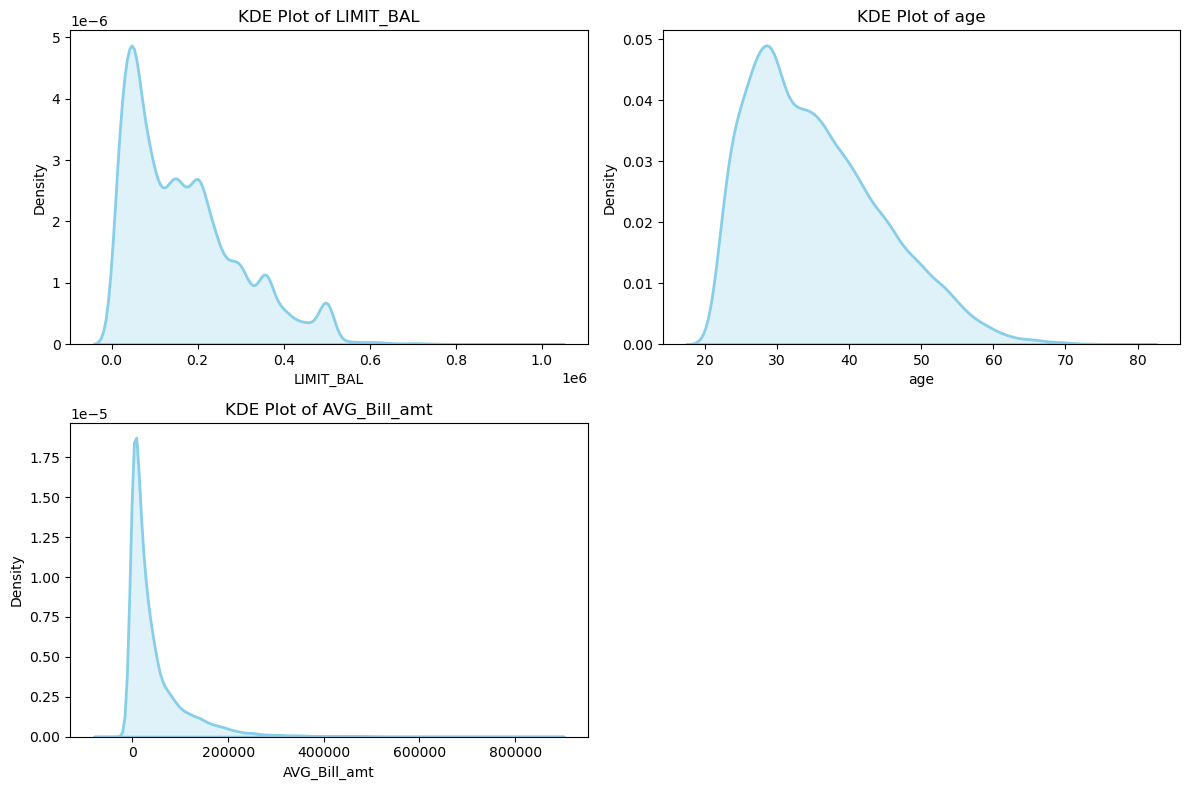

In [49]:
#limit_bal, age, avg_bill_amt, pay_to_bill_ratio
import matplotlib.pyplot as plt
import seaborn as sns

# Define your features
features = ['LIMIT_BAL', 'age', 'AVG_Bill_amt']

# Set up the subplots
plt.figure(figsize=(12, 8))

for i, feature in enumerate(features):
    plt.subplot(2, 2, i + 1)  # 2 rows, 2 columns
    sns.kdeplot(df[feature], fill=True, color='skyblue', linewidth=2)
    plt.title(f'KDE Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()



In [50]:
a = df["LIMIT_BAL"].skew()
b = df["age"].skew()
c = df["AVG_Bill_amt"].skew()

In [51]:
print(a)
print(b)
print(c)

0.9945725403539698
0.7384976486065989
2.73928102236778


*All of the three graphs above are right skewed with skewness value mentioned above*

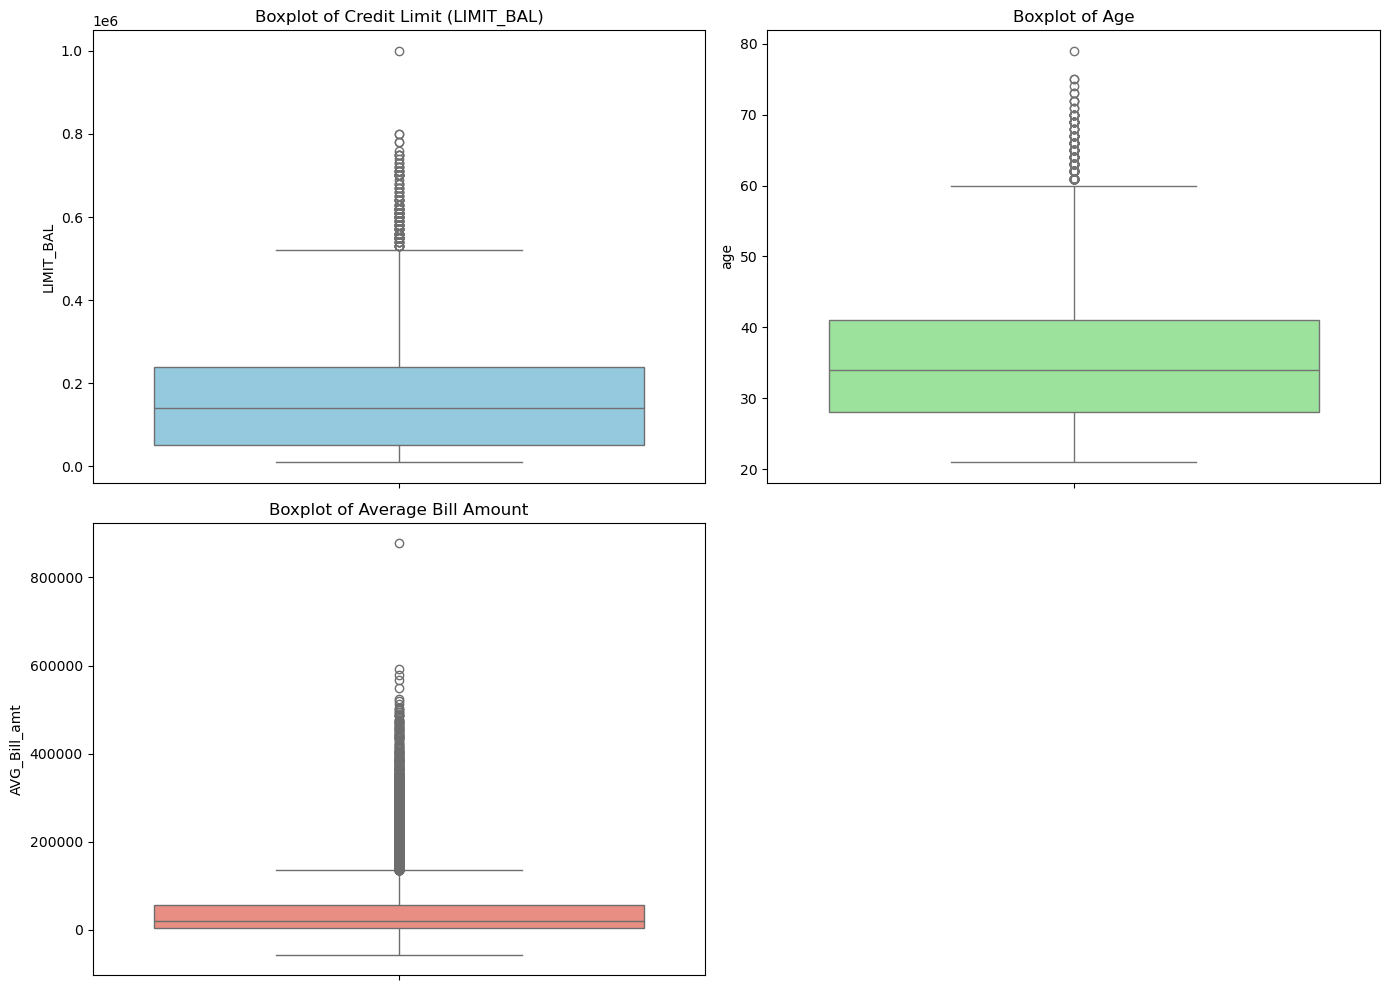

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you already loaded your dataset
# df = pd.read_csv('your_data.csv')

plt.figure(figsize=(14, 10))

# Boxplot 1 - Credit Limit
plt.subplot(2, 2, 1)
sns.boxplot(y='LIMIT_BAL', data=df, color='skyblue')
plt.title('Boxplot of Credit Limit (LIMIT_BAL)')

# Boxplot 2 - Age
plt.subplot(2, 2, 2)
sns.boxplot(y='age', data=df, color='lightgreen')
plt.title('Boxplot of Age')

# Boxplot 3 - Average Bill Amount
plt.subplot(2, 2, 3)
sns.boxplot(y='AVG_Bill_amt', data=df, color='salmon')
plt.title('Boxplot of Average Bill Amount')



plt.tight_layout()
plt.show()




Axes(0.125,0.11;0.775x0.77)
next_month_default
0    20440
1     4807
Name: count, dtype: int64


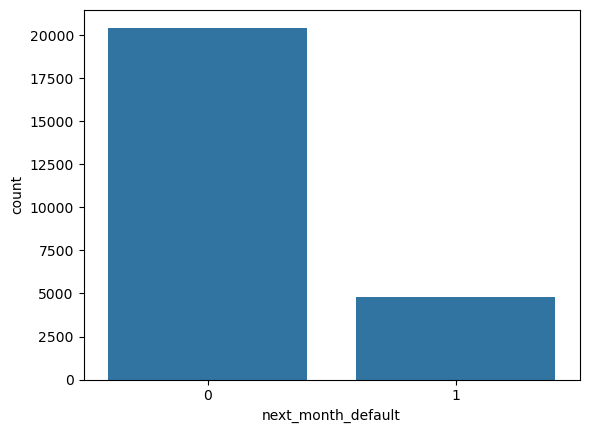

In [54]:
print(sns.countplot(x = 'next_month_default', data = df))
print(df['next_month_default'].value_counts())

**The dataset has severe class imbalance problem i.e. only 19 percent are defaulters, which can create problems like model getting biased to majority class
, poor minority class learning etc**

In [56]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(df1.iloc[:,0:-1], df1['next_month_default'])

print('Original dataset shape', len(df1))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 25121
Resampled dataset shape 40674


Axes(0.125,0.11;0.775x0.77)
next_month_default
0    20337
1    20337
Name: count, dtype: int64


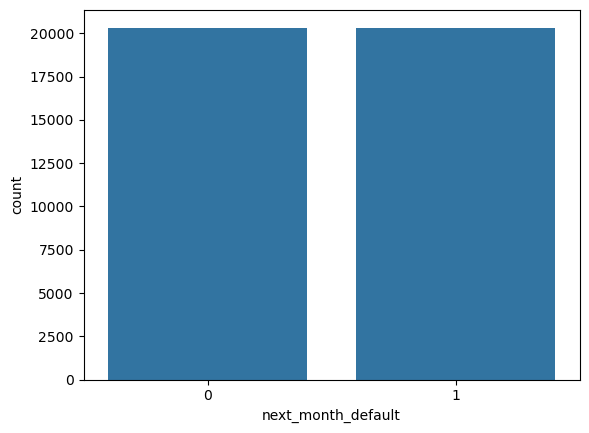

In [57]:
print(sns.countplot(x = y_smote, data = df1))
print(y_smote.value_counts())

In [58]:
# Importing all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc

from sklearn.svm import SVC

# FEATURE ENGINEERING AND TRANSFORMATIONS 

In [60]:
df_smote = pd.read_csv('train_dataset_final1.csv')
df_smote

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,...,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default
0,5017,2,0,2,60000,25.0,2,2,2,0,...,20750.63,2000.21,0.00,1134.85,1821.78,1500.03,1500.24,41511.50,0.03,0
1,5018,2,1,1,290000,24.0,0,0,-2,-2,...,1350.30,0.00,0.17,0.00,2700.10,0.00,1349.72,2534.50,0.27,0
2,5019,1,0,2,180000,63.0,0,0,0,0,...,52991.51,2086.94,2199.99,1845.66,2000.35,1923.00,1999.78,50422.00,0.04,0
3,5020,1,1,2,210000,43.0,0,0,0,0,...,76945.47,3348.07,3380.91,3400.45,2683.97,2744.00,2892.10,86229.50,0.04,0
4,5021,2,0,1,280000,32.0,-2,-2,-2,-2,...,1.35,999.78,3186.27,45027.78,2100.09,0.01,0.27,11814.33,0.72,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25242,30259,1,1,2,90000,33.0,0,0,0,0,...,90042.87,2800.18,3999.97,8000.09,5347.85,3699.98,3128.06,82312.50,0.05,0
25243,30260,1,0,2,60000,49.0,0,0,0,0,...,19204.07,22000.17,2187.56,2501.13,2512.09,4004.89,2604.22,41371.67,0.14,1
25244,30261,2,0,1,120000,31.0,-1,-1,-1,-1,...,9834.64,1315.83,1315.60,533.08,4116.08,9834.10,7100.12,3071.83,1.31,1
25245,30262,1,1,4,390000,40.0,0,0,0,0,...,199013.32,7636.03,5652.86,5544.67,5532.37,5859.09,6818.14,197278.83,0.03,0


In [61]:
df_smote.describe()

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,...,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default
count,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25121.000000,25247.000000,25247.000000,25247.000000,25247.000000,...,25247.000000,25247.000000,2.524700e+04,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000
mean,17640.000000,1.551907,0.604111,1.852101,168342.060443,35.438199,-0.042857,-0.159544,-0.190359,-0.241415,...,38806.221029,5718.624966,6.047352e+03,5288.910651,4865.960834,4906.766828,5270.499287,44859.647485,0.362962,0.190399
std,7288.325459,0.522629,0.489050,0.797379,129892.784807,9.174998,1.099315,1.173990,1.172636,1.146753,...,59182.792531,16806.842125,2.400962e+04,17851.879609,15979.116544,15860.726852,17960.816915,62819.226119,5.047206,0.392624
min,5017.000000,0.000000,0.000000,0.000000,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-56043.170000,-546.930000,0.000000
25%,11328.500000,1.000000,0.000000,1.000000,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1241.710000,999.985000,9.219100e+02,399.990000,300.150000,262.365000,130.070000,4858.670000,0.040000,0.000000
50%,17640.000000,2.000000,1.000000,2.000000,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,17102.580000,2145.020000,2.026830e+03,1844.300000,1500.100000,1513.790000,1500.040000,21102.830000,0.090000,0.000000
75%,23951.500000,2.000000,1.000000,2.000000,240000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,49245.195000,5031.150000,5.000190e+03,4600.640000,4014.990000,4099.890000,4018.780000,57136.580000,0.590000,0.000000
max,30263.000000,3.000000,1.000000,6.000000,1000000.000000,79.000000,8.000000,8.000000,8.000000,7.000000,...,961663.620000,873551.980000,1.684259e+06,896040.150000,621000.080000,426529.180000,528666.150000,877313.830000,205.380000,1.000000


In [62]:
df_smote = df_smote[(df_smote['AVG_Bill_amt']>0) & (df_smote['PAY_TO_BILL_ratio']>0)]
df_smote.shape

(23863, 27)

In [63]:
df_smote = df_smote[df_smote['age'].notna()]
df_smote.columns

Index(['Customer_ID', 'marriage', 'sex', 'education', 'LIMIT_BAL', 'age',
       'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'Bill_amt1',
       'Bill_amt2', 'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6',
       'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'AVG_Bill_amt', 'PAY_TO_BILL_ratio', 'next_month_default'],
      dtype='object')

In [64]:
df_smote.isnull().sum()

Customer_ID           0
marriage              0
sex                   0
education             0
LIMIT_BAL             0
age                   0
pay_0                 0
pay_2                 0
pay_3                 0
pay_4                 0
pay_5                 0
pay_6                 0
Bill_amt1             0
Bill_amt2             0
Bill_amt3             0
Bill_amt4             0
Bill_amt5             0
Bill_amt6             0
pay_amt1              0
pay_amt2              0
pay_amt3              0
pay_amt4              0
pay_amt5              0
pay_amt6              0
AVG_Bill_amt          0
PAY_TO_BILL_ratio     0
next_month_default    0
dtype: int64

In [65]:
df = df_smote
pay_amt_cols = ['pay_0','pay_2','pay_3','pay_4','pay_5']
df['total_payment'] = df[pay_amt_cols].sum(axis=1)
bill_amt_cols = ['Bill_amt6', 'Bill_amt5', 'Bill_amt4', 'Bill_amt3', 'Bill_amt2', 'Bill_amt1']
df['total_due'] = df[bill_amt_cols].sum(axis=1)
# # Count months delayed (value > 0 means delayed)
# 1. Credit Utilisation Ratio
df['Credit_Utilization_Ratio'] = df[['Bill_amt1', 'Bill_amt2', 'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6']].mean(axis=1) / df['LIMIT_BAL']

# 2. Delinquency Streak
pay_status = ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']
df['Delinquency_Streak'] = df[pay_status].apply(lambda row: sum(row > 0), axis=1)


In [66]:
df = df_smote.drop(columns = ['pay_6'])

In [67]:
X = df.drop(columns = ['next_month_default'])
y = df['next_month_default']

In [68]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [69]:
print(y_train[y_train == 0].shape)
print(y_train[y_train == 1].shape)
print(y_test[y_test == 0].shape)
print(y_test[y_test == 1].shape)
print(X_train.shape)

(15509,)
(3483,)
(3879,)
(870,)
(18992, 29)


In [70]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state =42)
X_train,y_train = sm.fit_resample(X_train,y_train)

In [71]:
print(y_train[y_train == 0].shape)
print(y_train[y_train == 1].shape)
print(y_test[y_test == 0].shape)
print(y_test[y_test == 1].shape)
print(X_train.shape)

(15509,)
(15509,)
(3879,)
(870,)
(31018, 29)


In [72]:
X_train

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,...,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,total_payment,total_due,Credit_Utilization_Ratio,Delinquency_Streak
0,19298,2,1,1,30000,29.000000,1,2,2,0,...,0.000000,0.000000,0.000000,0.050000,8192.170000,0.020000,5,49154.160000,0.273079,3
1,27094,2,1,2,50000,23.000000,0,0,0,0,...,5004.220000,999.980000,999.730000,1000.180000,31423.170000,0.130000,0,188539.520000,0.628465,0
2,22367,1,0,2,20000,48.000000,-1,0,0,-2,...,0.050000,0.000000,0.120000,0.000000,3603.670000,0.060000,-5,21624.220000,0.180202,0
3,9436,2,0,1,270000,34.000000,-1,-1,0,-1,...,6621.000000,2457.110000,14922.860000,1711.980000,9587.170000,0.760000,-4,57521.120000,0.035507,0
4,8144,2,1,2,120000,37.000000,2,2,2,0,...,9076.010000,8788.020000,1000.090000,1999.950000,34992.330000,0.120000,6,209955.560000,0.291605,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31013,10141,2,0,1,50000,27.530252,1,0,0,0,...,1238.836856,900.299540,1315.674212,1774.863401,28516.412552,0.045101,5,171097.368726,0.570325,2
31014,5935,1,0,1,30000,35.504338,0,0,0,0,...,1619.455034,2217.898719,4265.438966,1511.065371,29539.070089,0.081970,0,177233.432960,0.984630,0
31015,18508,1,1,2,50000,45.161742,2,2,2,2,...,1855.794739,531.867769,1584.074940,1656.215131,44193.071205,0.037201,10,265158.062500,0.883860,6
31016,22577,1,0,2,45427,46.773340,1,1,1,1,...,846.489266,2083.014634,1505.892848,1483.356881,32717.214204,0.050000,5,196305.418682,0.728433,3


# MODEL TRAINING AND VALIDATION

## LOGISTIC REGRESSION IMPLEMENTATION 

In [75]:
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, fbeta_score


y_pred_logistic = logistic_model.predict(X_test)

print(classification_report(y_test, y_pred_logistic))
                           
f2_score_logistic = fbeta_score(y_test, y_pred_logistic, beta=2, average='weighted')
print(f'Logistic Regression F2 Score: {f2_score_logistic:.2f}')

              precision    recall  f1-score   support

           0       0.89      0.58      0.70      3879
           1       0.27      0.70      0.39       870

    accuracy                           0.60      4749
   macro avg       0.58      0.64      0.54      4749
weighted avg       0.78      0.60      0.64      4749

Logistic Regression F2 Score: 0.60


In [76]:
# Let's try threshold optimization in above code

logistic_model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
logistic_model.fit(X_train, y_train)

y_probs = logistic_model.predict_proba(X_test)[:, 1]

best_f2 = 0
best_thresh = 0.5

for t in np.arange(0.1, 0.61, 0.01):
    preds = (y_probs > t).astype(int)
    score = fbeta_score(y_test, preds, beta=2, average='weighted')
    if score > best_f2:
        best_f2 = score
        best_thresh = t

y_pred_final = (y_probs > best_thresh).astype(int)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_final))

print(f"Best Threshold: {best_thresh:.2f}")
print(f"Weighted F2 Score: {best_f2:.4f}")



Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.81      0.84      3879
           1       0.37      0.51      0.43       870

    accuracy                           0.75      4749
   macro avg       0.63      0.66      0.64      4749
weighted avg       0.79      0.75      0.77      4749

Best Threshold: 0.60
Weighted F2 Score: 0.7573


## DECISION TREE IMPLEMENTATION 

In [78]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
y_pred_d = tree_model.predict(X_test)
print(classification_report(y_test, y_pred_d))

f2_score = fbeta_score(y_test, y_pred_d, beta=2, average='weighted')
print(f' Decision Tree F2 Score: {f2_score:.2f}')

              precision    recall  f1-score   support

           0       0.87      0.77      0.82      3879
           1       0.32      0.46      0.38       870

    accuracy                           0.72      4749
   macro avg       0.59      0.62      0.60      4749
weighted avg       0.76      0.72      0.74      4749

 Decision Tree F2 Score: 0.72


In [79]:
# Again we will try threshold optimization but now with hyperparameter tuning.

tree_model = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    class_weight='balanced',
    random_state=42
)
tree_model.fit(X_train, y_train)


y_probs1 = tree_model.predict_proba(X_test)[:, 1]


best_f2 = 0
best_thresh = 0.5

for t in np.arange(0.1, 1, 0.01):
    preds = (y_probs1 > t).astype(int)
    score = fbeta_score(y_test, preds, beta=2, average='weighted')
    if score > best_f2:
        best_f2 = score
        best_thresh = t

y_pred_final = (y_probs1 > best_thresh).astype(int)

print("Classification Report:\n")
print(classification_report(y_test, y_pred_final))

f2_weighted = fbeta_score(y_test, y_pred_final, beta=2, average='weighted')
print(f"Best Threshold: {best_thresh:.2f}")
print(f"Weighted F2 Score: {f2_weighted:.4f}")



Classification Report:

              precision    recall  f1-score   support

           0       0.86      0.93      0.89      3879
           1       0.51      0.32      0.39       870

    accuracy                           0.82      4749
   macro avg       0.69      0.63      0.64      4749
weighted avg       0.80      0.82      0.80      4749

Best Threshold: 0.70
Weighted F2 Score: 0.8121


## RANDOM FOREST IMPLEMENTATION 

In [81]:
from sklearn.ensemble import RandomForestClassifier
rf_mdl = RandomForestClassifier(class_weight='balanced',random_state=42)
rf_mdl.fit(X_train, y_train)

y_pred_r = rf_mdl.predict(X_test)
print(classification_report(y_test, y_pred_r))


f2_score_rf = fbeta_score(y_test, y_pred_r, beta=2, average='weighted')
print(f'Random Forest F2 Score: {f2_score_rf:.2f}')

              precision    recall  f1-score   support

           0       0.88      0.90      0.89      3879
           1       0.50      0.44      0.47       870

    accuracy                           0.82      4749
   macro avg       0.69      0.67      0.68      4749
weighted avg       0.81      0.82      0.81      4749

Random Forest F2 Score: 0.81


In [82]:
# Let's try threshold optimization in above code
y_probs2 = rf_mdl.predict_proba(X_test)[:, 1]
best_f2 = 0
best_thresh = 0.5  

for t in np.arange(0.1, 1.0, 0.01):
    preds = (y_probs2 > t).astype(int)
    score = fbeta_score(y_test, preds, beta=2, average='weighted')
    if score > best_f2:
        best_f2 = score
        best_thresh = t


y_pred_final = (y_probs2 > best_thresh).astype(int)


print("Classification Report:\n")
print(classification_report(y_test, y_pred_final))


f2_weighted = fbeta_score(y_test, y_pred_final, beta=2, average='weighted')
print(f"Best Threshold: {best_thresh:.2f}")
print(f"Weighted F2 Score: {f2_weighted:.4f}")



Classification Report:

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      3879
           1       0.56      0.38      0.45       870

    accuracy                           0.83      4749
   macro avg       0.71      0.66      0.68      4749
weighted avg       0.81      0.83      0.82      4749

Best Threshold: 0.58
Weighted F2 Score: 0.8247


## XGBOOST IMPLEMENTATION 

In [84]:
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [85]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

y_probs = xgb_model.predict_proba(X_test)[:, 1]
threshold = 0.5 # Custom threshold
y_pred_thresh = (y_probs > threshold).astype(int)
print("Classification Report:")
print(classification_report(y_test, y_pred_thresh))

f2_class_0 = fbeta_score(y_test, y_pred_thresh, beta=2, pos_label=0)
f2_class_1 = fbeta_score(y_test, y_pred_thresh, beta=2, pos_label=1)
f2_avg = (f2_class_0 + f2_class_1) / 2
f2_weighted = fbeta_score(y_test, y_pred_thresh, beta=2, average='weighted')

print(f"F2 Score - Class 0: {f2_class_0:.2f}")
print(f"F2 Score - Class 1: {f2_class_1:.2f}")
print(f"Average F2 Score: {f2_avg:.2f}")
print(f"Weighted F2 Score (Threshold = {threshold}): {f2_weighted:.2f}")



Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.92      0.90      3879
           1       0.53      0.40      0.46       870

    accuracy                           0.82      4749
   macro avg       0.70      0.66      0.68      4749
weighted avg       0.81      0.82      0.81      4749

F2 Score - Class 0: 0.91
F2 Score - Class 1: 0.42
Average F2 Score: 0.67
Weighted F2 Score (Threshold = 0.5): 0.82


In [86]:
# We will now edit above code of xgboost for hyperparameter optimization and threshold optimization.
from sklearn.metrics import fbeta_score, make_scorer, classification_report

from sklearn.model_selection import train_test_split, GridSearchCV
def f2_scorer(y_true, y_pred):
    return fbeta_score(y_true, y_pred, beta=2, average='weighted')

scorer = make_scorer(f2_scorer)

param_grid = {
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'n_estimators': [100, 200],
    'scale_pos_weight': [1, 2, 4.5]  
}

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
grid = GridSearchCV(xgb_model, param_grid, scoring=scorer, cv=3, verbose=1, n_jobs=-1)
grid.fit(X_train, y_train)

print("\nBest Params:", grid.best_params_)

best_model = grid.best_estimator_
y_probs = best_model.predict_proba(X_test)[:, 1]

best_thresh = 0
best_f2 = 0

for thresh in np.arange(0.1, 1, 0.01):
    y_preds = (y_probs > thresh).astype(int)
    score = fbeta_score(y_test, y_preds, beta=2, average='weighted')
    if score > best_f2:
        best_f2 = score
        best_thresh = thresh

y_pred_final = (y_probs > best_thresh).astype(int)
print(f"\nBest Threshold: {best_thresh:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_final))

f2_class_0 = fbeta_score(y_test, y_pred_final, beta=2, pos_label=0)
f2_class_1 = fbeta_score(y_test, y_pred_final, beta=2, pos_label=1)
f2_avg = (f2_class_0 + f2_class_1) / 2
f2_weighted = fbeta_score(y_test, y_pred_final, beta=2, average='weighted')

print(f"F2 Score - Class 0: {f2_class_0:.2f}")
print(f"F2 Score - Class 1: {f2_class_1:.2f}")
print(f"Average F2 Score: {f2_avg:.2f}")
print(f"Final Weighted F2 Score (Thresh = {best_thresh:.2f}): {f2_weighted:.4f}")


Fitting 3 folds for each of 24 candidates, totalling 72 fits

Best Params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'scale_pos_weight': 1}

Best Threshold: 0.61
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      3879
           1       0.59      0.32      0.42       870

    accuracy                           0.83      4749
   macro avg       0.72      0.64      0.66      4749
weighted avg       0.81      0.83      0.81      4749

F2 Score - Class 0: 0.93
F2 Score - Class 1: 0.35
Average F2 Score: 0.64
Final Weighted F2 Score (Thresh = 0.61): 0.8248


In [87]:
import numpy as np
from xgboost import XGBClassifier
from sklearn.metrics import fbeta_score, classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.utils import resample


n_splits = 10
n_bags = 10  
param_grid = {
    'learning_rate': 0.1,
    'max_depth': 5,
    'n_estimators': 100,
    'scale_pos_weight': 4.5
}

f2_scores_weighted = []
f2_scores_class0 = []
f2_scores_class1 = []
f2_thresholds = []


skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):
    print(f"\n=== Fold {fold + 1} ===")

    X_train_cv, X_val_cv = X.iloc[train_idx], X.iloc[val_idx]
    y_train_cv, y_val_cv = y.iloc[train_idx], y.iloc[val_idx]

    y_probs_bagged = np.zeros(len(X_val_cv))


    for seed in range(n_bags):
        X_resampled, y_resampled = resample(X_train_cv, y_train_cv, replace=True, random_state=seed)

        xgb = XGBClassifier(
            use_label_encoder=False,
            eval_metric='logloss',
            random_state=seed,
            **param_grid
        )

        xgb.fit(X_resampled, y_resampled)
        y_probs_bagged += xgb.predict_proba(X_val_cv)[:, 1]

    y_probs_bagged /= n_bags  


    best_thresh = 0.5
    best_f2 = 0
    for t in np.arange(0.1, 1.0, 0.01):
        preds = (y_probs_bagged > t).astype(int)
        f2 = fbeta_score(y_val_cv, preds, beta=2, average='weighted')
        if f2 > best_f2:
            best_f2 = f2
            best_thresh = t


    y_pred_final = (y_probs_bagged > best_thresh).astype(int)


    f2_0 = fbeta_score(y_val_cv, y_pred_final, beta=2, pos_label=0)
    f2_1 = fbeta_score(y_val_cv, y_pred_final, beta=2, pos_label=1)
    f2_weighted = fbeta_score(y_val_cv, y_pred_final, beta=2, average='weighted')


    f2_scores_weighted.append(f2_weighted)
    f2_scores_class0.append(f2_0)
    f2_scores_class1.append(f2_1)
    f2_thresholds.append(best_thresh)


    print(f"Best Threshold: {best_thresh:.2f}")
    print(f"F2 Class 0: {f2_0:.4f} | F2 Class 1: {f2_1:.4f}")
    print(f"Weighted F2: {f2_weighted:.4f}")
    print(classification_report(y_val_cv, y_pred_final))


print("\n=== Cross-Validation Summary ===")
print(f"Avg F2 Class 0: {np.mean(f2_scores_class0):.4f}")
print(f"Avg F2 Class 1: {np.mean(f2_scores_class1):.4f}")
print(f"Avg Weighted F2: {np.mean(f2_scores_weighted):.4f}")
print(f"Avg Optimal Threshold: {np.mean(f2_thresholds):.2f}")



=== Fold 1 ===
Best Threshold: 0.70
F2 Class 0: 0.9312 | F2 Class 1: 0.4391
Weighted F2: 0.8408
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1939
           1       0.63      0.41      0.50       436

    accuracy                           0.85      2375
   macro avg       0.75      0.68      0.70      2375
weighted avg       0.83      0.85      0.83      2375


=== Fold 2 ===
Best Threshold: 0.75
F2 Class 0: 0.9360 | F2 Class 1: 0.3702
Weighted F2: 0.8324
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1939
           1       0.63      0.34      0.44       435

    accuracy                           0.84      2374
   macro avg       0.75      0.65      0.67      2374
weighted avg       0.82      0.84      0.82      2374


=== Fold 3 ===
Best Threshold: 0.74
F2 Class 0: 0.9283 | F2 Class 1: 0.4074
Weighted F2: 0.8328
              precision    recall  f1-score   support



## LIGHTGBM IMPLEMENTATION 

In [89]:
import lightgbm as lgb
from sklearn.metrics import classification_report

gbm_model = lgb.LGBMClassifier()
gbm_model.fit(X_train, y_train)

y_pred6 = gbm_model.predict(X_test)
print(classification_report(y_test, y_pred6))

f2_score_lgb = fbeta_score(y_test, y_pred6, beta=2, average='weighted')
print(f'F2 Score: {f2_score_lgb:.2f}')

[LightGBM] [Info] Number of positive: 15509, number of negative: 15509
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003753 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4949
[LightGBM] [Info] Number of data points in the train set: 31018, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
              precision    recall  f1-score   support

           0       0.88      0.91      0.90      3879
           1       0.53      0.44      0.48       870

    accuracy                           0.83      4749
   macro avg       0.71      0.68      0.69      4749
weighted avg       0.82      0.83      0.82      4749

F2 Score: 0.82


In [90]:

from sklearn.metrics import classification_report, fbeta_score

y_probs5 = gbm_model.predict_proba(X_test)[:, 1]

best_f2 = 0
best_thresh = 0.5

for t in np.arange(0.1, 1.0, 0.01):
    preds = (y_probs5 > t).astype(int)
    score = fbeta_score(y_test, preds, beta=2, average='weighted')
    if score > best_f2:
        best_f2 = score
        best_thresh = t

y_pred_final = (y_probs5 > best_thresh).astype(int)

print("Classification Report:\n")
print(classification_report(y_test, y_pred_final))

print(f"Best Threshold: {best_thresh:.2f}")

f2_weighted = fbeta_score(y_test, y_pred_final, beta=2, average='weighted')
print(f"Weighted F2 Score: {f2_weighted:.4f}")


Classification Report:

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      3879
           1       0.60      0.34      0.43       870

    accuracy                           0.84      4749
   macro avg       0.73      0.64      0.67      4749
weighted avg       0.82      0.84      0.82      4749

Best Threshold: 0.60
Weighted F2 Score: 0.8280


In [91]:
import numpy as np
import lightgbm as lgb
from sklearn.metrics import fbeta_score, classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.utils import resample

# Parameters
n_estimators = 20  
n_splits = 10    

f2_scores = []
thresholds = []


skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):
    print(f"\n--- Fold {fold+1} ---")

    X_train_cv, X_val_cv = X.iloc[train_idx], X.iloc[val_idx]
    y_train_cv, y_val_cv = y.iloc[train_idx], y.iloc[val_idx]
    
    y_probs_bagged = np.zeros(len(X_val_cv))
    
    for i in range(n_estimators):
        gbm = lgb.LGBMClassifier(random_state=i, verbose=-1, class_weight='balanced')

        gbm.fit(X_resampled, y_resampled)
        y_probs_bagged += gbm.predict_proba(X_val_cv)[:, 1]
    
    y_probs_bagged /= n_estimators

    best_f2 = 0
    best_thresh = 0.5
    for t in np.arange(0.1, 1.0, 0.01):
        preds = (y_probs_bagged > t).astype(int)
        score = fbeta_score(y_val_cv, preds, beta=2, average='weighted')
        if score > best_f2:
            best_f2 = score
            best_thresh = t

    y_pred_final = (y_probs_bagged > best_thresh).astype(int)

    print(f"Best Threshold: {best_thresh:.2f}")
    print(f"Weighted F2 Score: {best_f2:.4f}")
    print(classification_report(y_val_cv, y_pred_final))

    f2_scores.append(best_f2)
    thresholds.append(best_thresh)

print("\n=== Cross-Validation Summary ===")
print(f"Average F2 Score: {np.mean(f2_scores):.4f}")
print(f"Thresholds per fold: {thresholds}")
print(f"Average Best Threshold: {np.mean(thresholds):.2f}")


--- Fold 1 ---
Best Threshold: 0.66
Weighted F2 Score: 0.8733
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      1939
           1       0.70      0.56      0.63       436

    accuracy                           0.88      2375
   macro avg       0.80      0.76      0.78      2375
weighted avg       0.87      0.88      0.87      2375


--- Fold 2 ---
Best Threshold: 0.62
Weighted F2 Score: 0.8665
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1939
           1       0.65      0.59      0.62       435

    accuracy                           0.87      2374
   macro avg       0.78      0.76      0.77      2374
weighted avg       0.86      0.87      0.86      2374


--- Fold 3 ---
Best Threshold: 0.69
Weighted F2 Score: 0.8634
              precision    recall  f1-score   support

           0       0.90      0.95      0.92      1939
           1       0.69      0.51      0.58     

### **Chosen Metrics and Justification**

**1. Recall (Sensitivity)**  
**Measures the proportion of actual defaulters that are correctly identified.**  
**In credit risk, missing a defaulter is costlier than wrongly rejecting a safe customer.**

**2. F2-Score**  
**A harmonic mean of precision and recall, but recall is weighted more heavily.**  
**It’s a more practical metric in scenarios where catching all risky customers matters most.**

**3. Confusion Matrix**  
**Gives a direct view of True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN).**  
**Provides clear insight into how many defaulters we’re missing (FN) and how many good customers we’re rejecting (FP).**

**4. ROC-AUC Score**  
**Area under the ROC curve. Represents the model's ability to distinguish between classes.**  
**Higher AUC indicates better overall classification performance.**


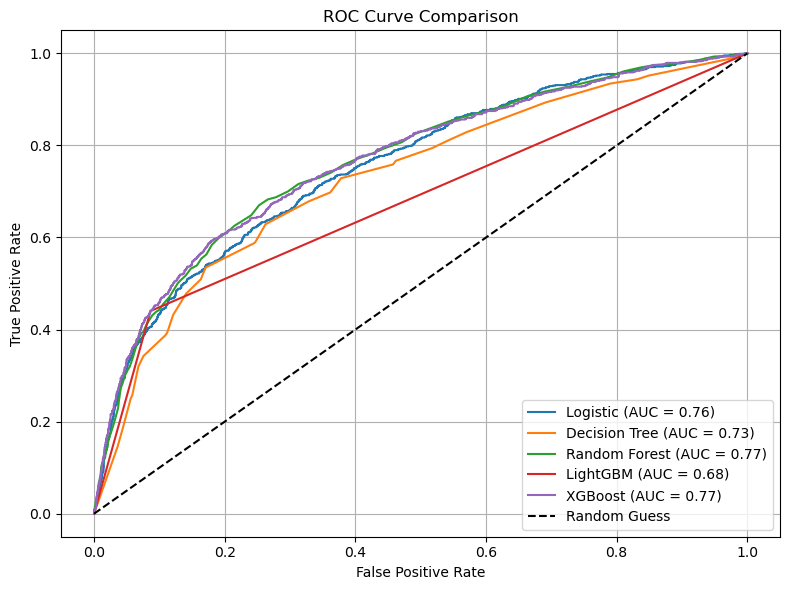

In [93]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


def plot_roc_curve(model_name, y_test, y_probs):
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.figure(figsize=(8, 6))

# Logistic Regression
y_probs_logistic = logistic_model.predict_proba(X_test)[:, 1]
plot_roc_curve("Logistic", y_test, y_probs)

# Decision Tree
y_probs_tree = tree_model.predict_proba(X_test)[:, 1]
plot_roc_curve("Decision Tree", y_test, y_probs1)

# Random Forest
y_probs_rf = rf_mdl.predict_proba(X_test)[:, 1]
plot_roc_curve("Random Forest", y_test, y_probs2)

# LightGBM
y_probs_lgb = gbm_model.predict_proba(X_test)[:, 1]
plot_roc_curve("LightGBM", y_test, y_pred6)

# XGBoost
y_probs_xgb = best_model.predict_proba(X_test)[:, 1]  # or `xgb_model` if no GridSearch
plot_roc_curve("XGBoost", y_test, y_probs5)

# Final touches
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


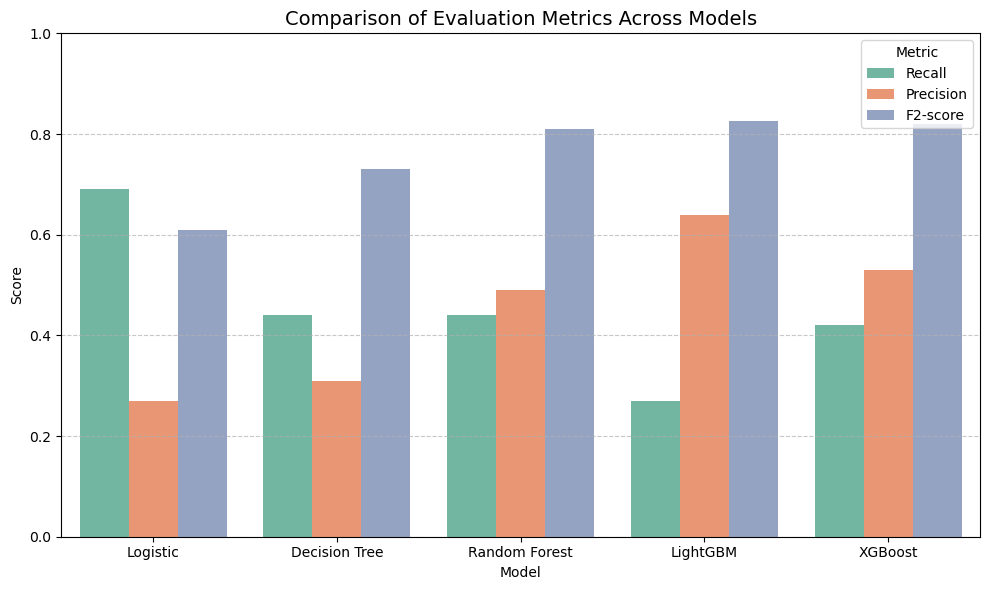

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Your provided metrics
metrics_data = {
    'Model': ['Logistic', 'Decision Tree', 'Random Forest', 'LightGBM', 'XGBoost'],
    'Recall':     [0.69, 0.44, 0.44, 0.27, 0.42],     
    'Precision':  [0.27, 0.31, 0.49, 0.64, 0.53],     
    'F2-score':   [0.61, 0.73, 0.81, 0.8255, 0.82]    
}

# Convert to DataFrame
df_metrics = pd.DataFrame(metrics_data)

# Melt for seaborn plotting
df_melted = df_metrics.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df_melted, x='Model', y='Score', hue='Metric', palette='Set2')

# Styling
plt.title('Comparison of Evaluation Metrics Across Models', fontsize=14)
plt.ylim(0, 1)
plt.ylabel('Score')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Metric', loc='upper right')
plt.tight_layout()
plt.show()


**Among the evaluated models, LIGHTGBM demonstrates the most favorable trade-off:**

**It achieves a high weighted F2-score (0.8280).**

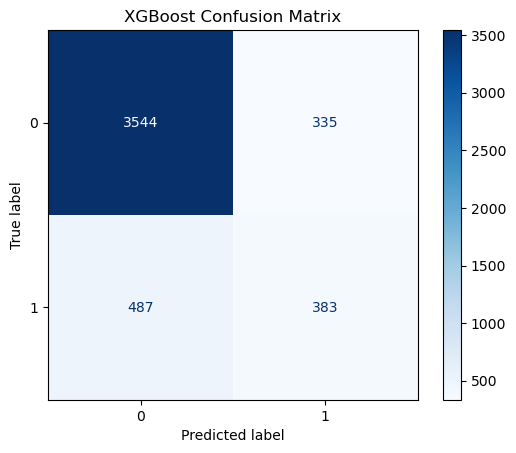

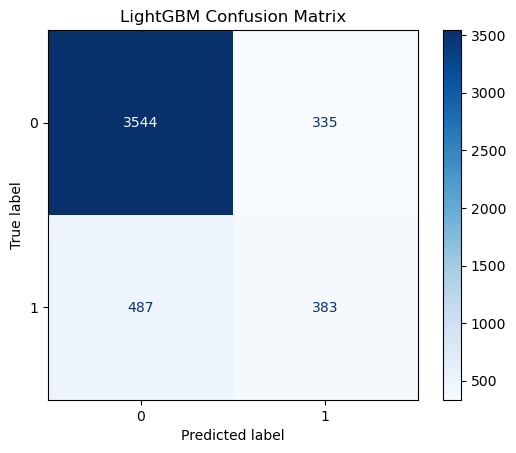

In [96]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Function to plot confusion matrix
def plot_confusion_matrix(y_test, y_pred, title):
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(title)
    plt.show()
# Convert y_probs5 to class labels before plotting
y_pred5 = (y_probs5 > 0.5).astype(int)

# Now call your function with proper inputs
plot_confusion_matrix(y_test, y_pred5, 'XGBoost Confusion Matrix')

# LightGBM
plot_confusion_matrix(y_test, y_pred6, 'LightGBM Confusion Matrix')



### **Threshold Selection**

**Instead of using the default threshold of 0.5, I tuned the threshold for each model to maximize the F2-score, which favors recall.**  
**For each model (Logistic Regression, Decision Tree, Random Forest, LightGBM, XGBoost),**  
**I tested multiple thresholds (e.g., 0.1 to 1) and selected the one that provided the best trade-off between false negatives (FN) and false positives (FP).**

**Below is the description of the threshold I have obtained:**

- **Logistic Regression → 0.60**  
- **Decision Tree → 0.7**  
- **Random Forest → 0.58**  
- **LightGBM → 0.60**  
- **XGBoost → 0.61**


### **Business Implications of Classification Outcomes**

| **Outcome**            | **Description**                             | **Business Impact**                                                  |
|------------------------|---------------------------------------------|-----------------------------------------------------------------------|
| **True Positive (TP)** | Defaulter correctly identified               |  **Good** – High-risk applicant is rejected                         |
| **True Negative (TN)** | Safe customer correctly accepted             |  **Good** – Low-risk applicant is accepted                          |
| **False Positive (FP)**| Safe customer incorrectly marked as defaulter|  **Loss of good customer** – Possible revenue loss                 |
| **False Negative (FN)**| Defaulter incorrectly marked as safe         |  **High risk** – Leads to **credit default loss**                  |



### **Prediction on Validation dataset**

In [100]:
df1=pd.read_csv('validate_dataset_final.csv')

In [101]:
df1.head()

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,...,Bill_amt5,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio
0,1,1,1,2,220000,32,0,0,0,0,...,17831.13,15670.47,2000.03,3999.90,1419.80,1999.97,3000.21,30788.71,23456.33,0.31
1,2,2,0,1,350000,35,-1,-1,-1,0,...,10832.78,2261.45,33891.01,16267.19,4026.80,234.10,1565.11,26346.39,13660.33,1.00
2,3,2,1,1,310000,39,0,0,0,0,...,240520.57,246524.45,11026.94,10499.83,14000.32,10000.12,10000.16,10000.21,258034.17,0.04
3,4,1,0,2,20000,47,0,0,0,2,...,15040.17,14749.97,1200.00,2799.83,0.14,1499.93,0.02,1000.26,13333.33,0.08
4,5,2,1,2,500000,30,0,0,0,0,...,69054.15,64841.30,25463.94,43095.31,7521.96,9065.17,8841.07,12000.21,77204.50,0.23


In [102]:
df1.describe()

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,...,Bill_amt5,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio
count,5016.000000,5016.000000,5016.000000,5016.000000,5016.000000,5016.000000,5016.000000,5016.000000,5016.000000,5016.000000,...,5016.000000,5016.000000,5016.000000,5.016000e+03,5016.000000,5016.000000,5016.000000,5016.000000,5016.000000,5016.000000
mean,2508.500000,1.554027,0.606659,1.840909,168977.272727,35.379785,-0.031300,-0.161683,-0.188198,-0.235048,...,41244.782709,39805.868369,5356.196780,6.321958e+03,5420.142849,5150.979306,4926.404159,5148.384402,46054.169703,0.417159
std,1448.138806,0.517560,0.488540,0.794177,129478.787500,9.206542,1.116011,1.178731,1.172155,1.129667,...,62255.394325,60698.632561,13660.489329,2.920905e+04,17011.204561,17376.949234,17085.022267,16879.411346,65214.851897,13.729586
min,1.000000,0.000000,0.000000,0.000000,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-10897.000000,-546.930000
25%,1254.750000,1.000000,0.000000,1.000000,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1755.395000,1205.210000,1000.047500,9.899050e+02,403.265000,278.172500,299.310000,156.382500,4905.665000,0.040000
50%,2508.500000,2.000000,1.000000,2.000000,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,17953.255000,17054.315000,2093.655000,2.000410e+03,1845.425000,1500.120000,1500.155000,1453.210000,20933.415000,0.090000
75%,3762.250000,2.000000,1.000000,2.000000,240000.000000,41.250000,0.000000,0.000000,0.000000,0.000000,...,50175.052500,49070.565000,5029.505000,5.000323e+03,4883.887500,4282.550000,4097.725000,4000.095000,56573.540000,0.570000
max,5016.000000,3.000000,1.000000,6.000000,800000.000000,75.000000,8.000000,7.000000,7.000000,7.000000,...,547880.830000,513798.830000,323014.110000,1.684259e+06,371717.910000,432129.910000,426529.180000,260000.100000,548854.330000,797.000000


In [103]:
df1.isnull().sum()

Customer_ID          0
marriage             0
sex                  0
education            0
LIMIT_BAL            0
age                  0
pay_0                0
pay_2                0
pay_3                0
pay_4                0
pay_5                0
pay_6                0
Bill_amt1            0
Bill_amt2            0
Bill_amt3            0
Bill_amt4            0
Bill_amt5            0
Bill_amt6            0
pay_amt1             0
pay_amt2             0
pay_amt3             0
pay_amt4             0
pay_amt5             0
pay_amt6             0
AVG_Bill_amt         0
PAY_TO_BILL_ratio    0
dtype: int64

In [104]:
df1 = df1[(df1['AVG_Bill_amt']>0) & (df1['PAY_TO_BILL_ratio']>0)]
df1.shape

(4749, 26)

In [105]:
pay_amt_cols = ['pay_0','pay_2','pay_3','pay_4','pay_5']
df1['total_payment'] = df1[pay_amt_cols].sum(axis=1)
bill_amt_cols = ['Bill_amt6', 'Bill_amt5', 'Bill_amt4', 'Bill_amt3', 'Bill_amt2', 'Bill_amt1']
df1['total_due'] = df1[bill_amt_cols].sum(axis=1)
# # Count months delayed (value > 0 means delayed)
# 1. Credit Utilisation Ratio
df1['Credit_Utilization_Ratio'] = df1[['Bill_amt1', 'Bill_amt2', 'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6']].mean(axis=1) / df['LIMIT_BAL']

# 2. Delinquency Streak
pay_status = ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']
df1['Delinquency_Streak'] = df1[pay_status].apply(lambda row: sum(row > 0), axis=1)


In [106]:
df1 = df1.drop(columns = ['pay_6'])

In [213]:
import pandas as pd

# Extract Customer_IDs and drop from features if present
customer_ids = df1['Customer_ID']
X_unlabelled = df1.drop(columns=['Customer_ID'])

# Get predicted probabilities for class 1
y_val_probs = gbm_model.predict_proba(df1)[:, 1]

# Apply optimal threshold
y_val_preds = (y_val_probs > best_thresh).astype(int)

# Create submission DataFrame
submission_df = pd.DataFrame({
    'Customer': customer_ids,
    'next_month_default': y_val_preds
})

# Save submission
submission_df.to_csv('submission_23112062.csv', index=False)

print("✅ Submission file created successfully:")
print(submission_df.head())


✅ Submission file created successfully:
   Customer  next_month_default
0         1                   0
1         2                   0
2         3                   0
3         4                   0
4         5                   0


In [215]:
submission_df[submission_df['next_month_default'] == 1]

,Customer,next_month_default
40,41,1
59,60,1
61,62,1
81,82,1
82,83,1
...,...,...
4925,4926,1
4926,4927,1
4972,4973,1
4994,4995,1


In [ ]:
from sklearn.metrics import accuracy_score

# Train a RandomForestClassifier using the best hyperparameters from Optuna
best_model = RandomForestClassifier(**study.best_trial.params, random_state=42)

# Fit the model to the training data
best_model.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate the accuracy on the test set
test_accuracy =  fbeta_score(y_test, y_pred, beta=2, average='binary')

# Print the test accuracy
print(f'Test Accuracy with best hyperparameters: {test_accuracy:.2f}')